In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from tensorflow.keras.datasets import mnist

In [10]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

In [11]:
def get_data():
    (x_train, t_train), (x_test, t_test) = mnist.load_data()
    x_test = x_test.reshape(-1, 784).astype('float32') / 255.0
    return x_test, t_test

def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

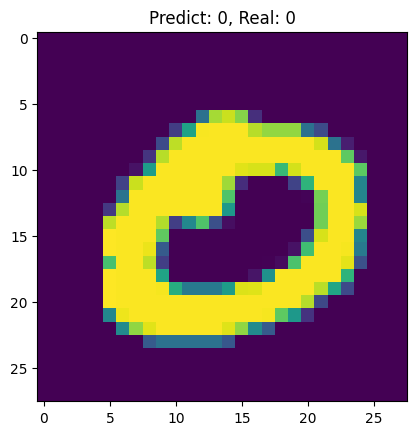

In [12]:
import random

x, t = get_data()
network = init_network()

random_index = random.randint(0, len(x) - 1)
random_image = x[random_index].reshape(1, -1)
random_label = t[random_index]

predicted_output = predict(network, random_image)
predicted_label = np.argmax(predicted_output)

plt.imshow(random_image.reshape(28, 28))
plt.title(f"Predict: {predicted_label}, Real: {random_label}")
plt.show()